In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
#导入测试集和训练集
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
#查看训练集和测试集的基本信息
conbine=[train,test]
PassengerId=test['PassengerId']

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


对分类数据进行相关性分析，对连续数据进行可视化分析，并进行数据预处理。

分类数据：

In [5]:
#Pclass与Survived的关系
#对数据框中的"Pclass"（舱位等级）和"Survived"（是否幸存）两列进行分组统计，并计算不同舱位等级的幸存率
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#按照"Pclass"列的取值进行分组，as_index=False表示不将分组的列作为索引。
#mean()函数计算每组的均值，sort_values()函数按照"Survived"列的降序进行排序。

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [6]:
# Sex与Survived关系(求的平均值)
train[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [7]:
# SibSp与Survived关系（兄弟姐妹和配偶数量）
train[['SibSp','Survived']].groupby('SibSp',as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [8]:
# Parch与Survived关系（船上有父母和孩子）
train[['Parch','Survived']].groupby('Parch',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [9]:
# Embarked与Survived关系（登船口岸与生存率关系）
train[['Embarked','Survived']].groupby('Embarked',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


连续数据可视化展示：

(array([13.,  5., 11.,  5., 51., 48., 56., 54., 30., 34., 28., 17., 23.,
        15.,  7.,  8.,  7.,  6.,  2.,  4.]),
 array([ 1.  ,  4.65,  8.3 , 11.95, 15.6 , 19.25, 22.9 , 26.55, 30.2 ,
        33.85, 37.5 , 41.15, 44.8 , 48.45, 52.1 , 55.75, 59.4 , 63.05,
        66.7 , 70.35, 74.  ]),
 <BarContainer object of 20 artists>)

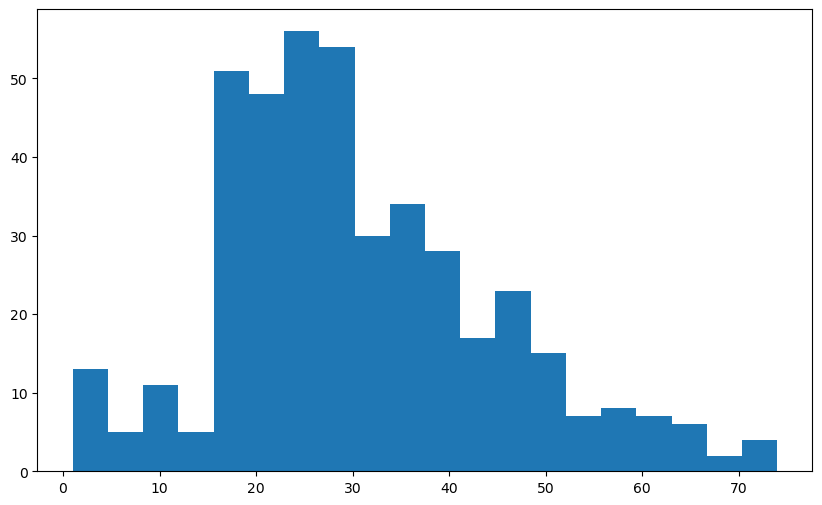

In [10]:
#这里使用了 train 数据框中未幸存的乘客的年龄数据，并将其分成 20 个箱子（bins=20）。这将展示未幸存乘客年龄的分布情况。
plt.figure(figsize=(10,6))
plt.hist(train.Age[train['Survived']==0],bins=20)

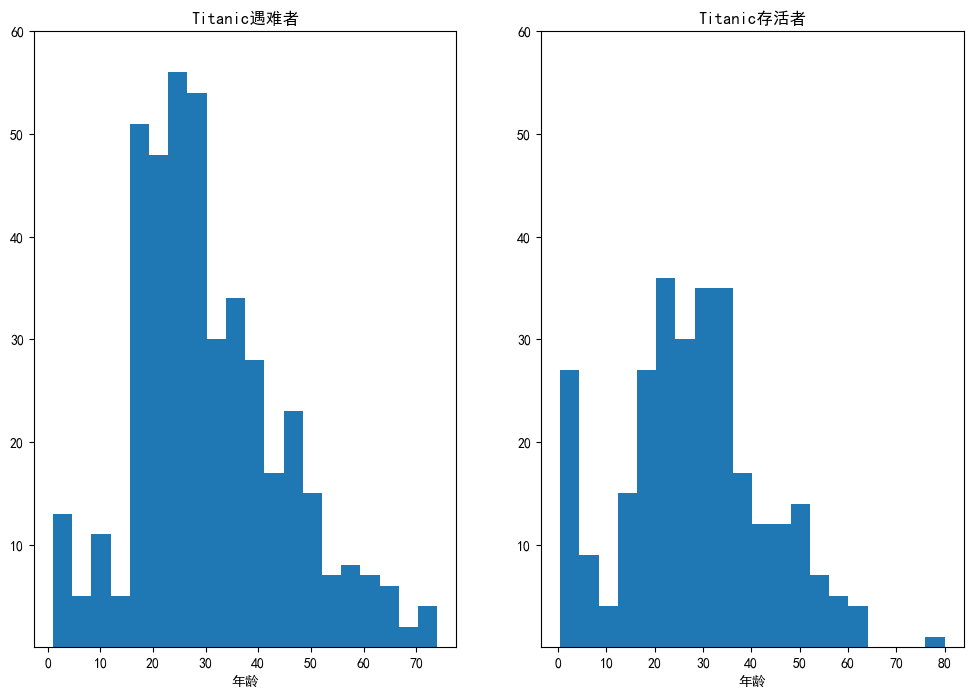

In [11]:
plt.figure(figsize=(12,8))

mpl.rcParams['font.family']='SimHei'

ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)

ax1.set_title('Titanic遇难者')
ax1.hist(train.Age[train['Survived']==0],bins=20)
ax1.set_xlabel('年龄')
ax1.set_yticks([10,20,30,40,50,60])

ax2.set_title('Titanic存活者')
ax2.hist(train.Age[train['Survived']==1],bins=20)
ax2.set_xlabel('年龄')
ax2.set_yticks([10,20,30,40,50,60])

plt.show()

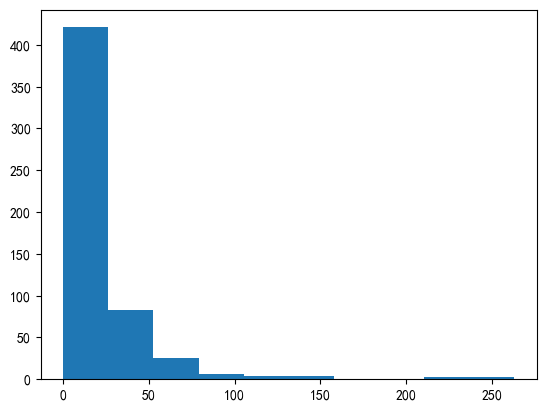

In [12]:
# Fare与Survived关系(此处y轴为遇难人数)
fare=train.Fare[train['Survived']==0]
plt.hist(fare)
plt.show()

数据清理

In [13]:
# 删除无用特征
train.head()
train=train.drop(["Ticket","Cabin"],axis=1)
test=test.drop(["Ticket","Cabin"],axis=1)
combine=[train,test]

In [14]:
# 创建新特征：
#从乘客的姓名中提取出称谓（Title）作为新特征的一部分
train.Name.str.extract(' ([a-zA-Z]+)\.',expand=False)
for database in combine:
    database['Title']=database.Name.str.extract(' ([a-zA-Z]+)\.',expand=False)

In [15]:
#train['Title'] 表示使用称谓列作为行索引，train['Sex'] 表示使用性别列作为列索引。这样，交叉表会统计每个称谓在不同性别下的出现次数。
pd.crosstab(train['Title'],train['Sex'])   #crosstab 交叉提取列

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [16]:
#将一些不常见的称谓归类为一个共同的类别，并对部分称谓进行替换。
for database in combine:
    database['Title']=database['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    database['Title']=database['Title'].replace('Mlle','Miss')
    database['Title']=database['Title'].replace('Ms','Miss')
    database['Title']=database['Title'].replace('Mme','Mrs')

In [17]:
train[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [18]:
#创建了新特征后，姓名等列就没用了可以删掉
train=train.drop(['PassengerId','Name'],axis=1)
test=test.drop(['PassengerId','Name'],axis=1)
combine=[train,test]

In [19]:
# 填写Embarked(登船港口差两个数据)特征，填充最多数的值
#将缺失值用出现频率最高的值进行了填充
freq=train.Embarked.dropna().mode()[0]
for database in combine:
    database.Embarked=database.Embarked.fillna(freq)

In [20]:
# 填充Age，根据乘客的舱位等级（Pclass）、性别（Sex）和称谓（Title）进行分组，并计算每个分组的平均年龄，然后将缺失值填充为对应分组的平均年龄。
grp=train.groupby(['Pclass','Sex','Title'])['Age'].mean().reset_index()  #使用与年龄相关的变量进行分组查看
#如果年龄值是缺失的（NaN），则调用 file_age() 函数根据该行的舱位等级、性别和称谓来填充缺失值；否则保持原来的年龄值不变。
def file_age(x):
    return grp[(grp['Pclass']==x['Pclass'])&(grp['Sex']==x['Sex'])&(grp['Title']==x['Title'])].Age.values[0]
train['Age']=train.apply(lambda x: file_age(x) if np.isnan(x['Age']) else x['Age'] ,axis=1)
test['Age']=test.apply(lambda x: file_age(x) if np.isnan(x['Age']) else x['Age'] ,axis=1)

combine=[train,test]

处理非数字类型变量（分类特征）


In [21]:
# 处理Sex
for database in combine:
    database['Sex']=database['Sex'].map({'female':1,'male':0}).astype(int)

In [22]:
# 处理Embarked
for database in combine:
    database['Embarked']=database['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [23]:
# 处理Title
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
# for database in combine:.astype(int)
#     database['Title']=database['Title'].map(title_mapping).astype(int)
for database in combine:
    database['Title']=database['Title'].map(title_mapping).astype(int)

连续特征转化为离散

In [24]:
#将 train['Age'] 列的数值按照指定的区间进行划分。参数 5 表示将年龄分成五个等宽的区间。划分后，每个乘客的年龄值会被映射到对应的区间段，并存储在新的 AgeBand 特征列中。
train['AgeBand']= pd.cut(train['Age'],5)
train['AgeBand']

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
             ...       
886    (16.336, 32.252]
887    (16.336, 32.252]
888      (0.34, 16.336]
889    (16.336, 32.252]
890    (16.336, 32.252]
Name: AgeBand, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [25]:
# 处理Age，离散化

for database in combine:
    database.loc[database['Age']<16,'Age']=0
    database.loc[(database['Age']>=16)&(database['Age']<32),'Age']=1
    database.loc[(database['Age']>=32)&(database['Age']<48),'Age']=2
    database.loc[(database['Age']>=48)&(database['Age']<64),'Age']=3
    database.loc[database['Age']>=64,'Age']=4
    
train.drop(['AgeBand'],axis=1,inplace=True)
conmbine=[train,test]
train['FareBand'] = pd.qcut(train['Fare'],4)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareBand
0,0,3,0,1.0,1,0,7.2500,0,1,"(-0.001, 7.91]"
1,1,1,1,2.0,1,0,71.2833,1,3,"(31.0, 512.329]"
2,1,3,1,1.0,0,0,7.9250,0,2,"(7.91, 14.454]"
3,1,1,1,2.0,1,0,53.1000,0,3,"(31.0, 512.329]"
4,0,3,0,2.0,0,0,8.0500,0,1,"(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,13.0000,0,5,"(7.91, 14.454]"
887,1,1,1,1.0,0,0,30.0000,0,2,"(14.454, 31.0]"
888,0,3,1,1.0,1,2,23.4500,0,2,"(14.454, 31.0]"
889,1,1,0,1.0,0,0,30.0000,1,1,"(14.454, 31.0]"


In [26]:
#使用 "Fare" 列的均值来填充缺失值，并将结果存储回 "test" 数据框中的 "Fare" 列。
test['Fare']=test['Fare'].fillna(test['Fare'].mean())


In [27]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.454),'Fare']=1
    dataset.loc[(dataset['Fare']>14.454)&(dataset['Fare']<=31),'Fare']=2
    dataset.loc[dataset['Fare']>31,'Fare']=3
    dataset['Fare']=dataset['Fare'].astype(int)
    
train=train.drop(['FareBand'],axis=1)
combine=[train,test]

合并特征

In [28]:
test['Family']= test['Parch']+test['SibSp']+1
test['Family']

0      1
1      2
2      1
3      1
4      3
      ..
413    1
414    1
415    1
416    1
417    3
Name: Family, Length: 418, dtype: int64

In [29]:
for database in combine:
    database['Family']=database['SibSp']+database['Parch']+1

In [30]:
for database in combine:
    database['IsAlone']=1
    database.loc[database['Family']>1,'IsAlone']=0


In [31]:
train.drop(['SibSp','Parch','Family'],axis=1,inplace=True)
test.drop(['SibSp','Parch','Family'],axis=1,inplace=True)
combine=[train,test]

选择模型进行预测


In [34]:
X_train=train.drop(['Survived'],axis=1)  #自变量
Y_train=train['Survived']  #因变量
# 逻辑回归
from sklearn.linear_model import LogisticRegression   #按下tab可以提示代码
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
# 预测Y)
Y_pred=logreg.predict(test)
acc_log = round(logreg.score(X_train,Y_train)*100)
acc_log

81

In [35]:
# 支持向量机 SVC
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
acc_svc

83.39

In [36]:
# 决策树
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred=decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

86.42

In [37]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier()
random_forest.fit(X_train,Y_train)
Y_pred=random_forest.predict(test)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

86.42

In [38]:
# K阶近邻
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred=knn.predict(test)
acc_knn = round(knn.score(X_train,Y_train)*100,2)
acc_knn

82.49

In [39]:
# 朴素贝叶斯
from sklearn.naive_bayes import GaussianNB

gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred=gaussian.predict(test)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

77.33

In [40]:
models=pd.DataFrame({
    'Models':['Logistic Regression','Support Vector Machines','KNN','Naive Bayes',
             'Decision Tree','Random Forest'],
    'Score':[acc_log,acc_svc,acc_knn,acc_gaussian,acc_decision_tree,acc_random_forest]
})
models.sort_values(by='Score',ascending=False)

,Models,Score
4,Decision Tree,86.42
5,Random Forest,86.42
1,Support Vector Machines,83.39
2,KNN,82.49
0,Logistic Regression,81.00
3,Naive Bayes,77.33


In [41]:
PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [42]:
# 决策树
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred=decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [43]:
submission=pd.DataFrame({
    'PassengerId':PassengerId,
    'Survived':Y_pred
})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [44]:
submission.to_csv('submission.csv',index=False)